<a href="https://colab.research.google.com/github/Kalina95/MachineLearningCourse/blob/main/01_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing - Theory

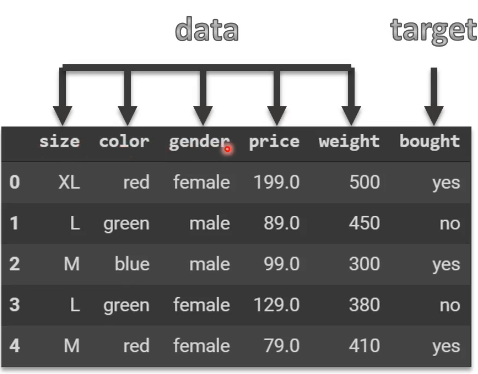

Bought is label, we need to map label from yes/no to 1/0 values.
Size, Color, Gender are categories, and we also need to map categories to 0 and 1 values, but in a bit different way. For every n values in category (M,L,XL in size) there will be n-1 new columns.

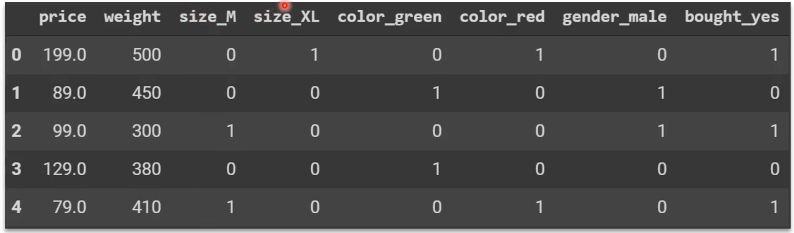

Standaryzacja zmiennych - od zmiennych numerycznych (int float double etc.) odejmujemy średnią i dzielimy przez odchylenie standardowe:

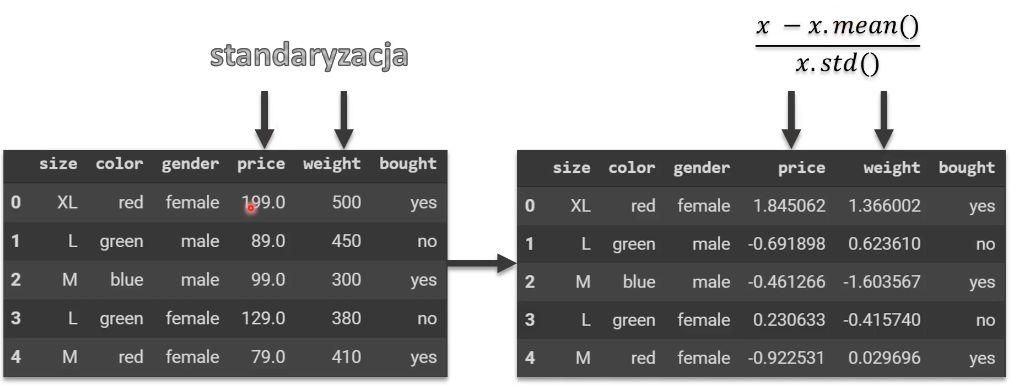

# Installing and import libriaries

When you're working on local files, you'll propably need to install libs on yopur own. Please use commands:



```
!pip install sickit-learn
!pip install numpy
!pip install pandas
```



In [132]:
import numpy as np
import pandas as pd
import sklearn

# Data Preprocessing - Practice

## DataFrame Preparation


1. Creating `data` object as dictionary.
2. Creating pandas dataframe based on this object.
3. Copying dataframe to other object to have some "backup"


> `df.info()` Gives us information about columns i dataframe. It's easy to see here, if there are some null values in data set.
This command shows us also data type in column. It's good practice to refactor data type `object` to categorized data type. It's much more effective for visualization.

> `df.copy()` creates copy of dataframe.

In [133]:
data = {
    'size': ['XL', 'L', 'M', 'L', 'M'],
    'color': ['red', 'green', 'blue', 'green', 'red'],
    'gender': ['female', 'male', 'male', 'female', 'female'],
    'price': [199.0, 89.0, 99.0, 129.0, 79.0],
    'weight': [500, 450, 300, 380, 410],
    'bought': ['yes', 'no', 'yes', 'no', 'yes']
}

df_raw = pd.DataFrame(data=data)

df = df_raw.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   size    5 non-null      object 
 1   color   5 non-null      object 
 2   gender  5 non-null      object 
 3   price   5 non-null      float64
 4   weight  5 non-null      int64  
 5   bought  5 non-null      object 
dtypes: float64(1), int64(1), object(4)
memory usage: 368.0+ bytes


## Data Preprocessing - Label



We'd like to transofmr `object` datatype to categorized datatype - `true/false` or `1/0`

In [134]:
for column in ['size', 'color', 'gender', 'bought']:
  df[column] = df[column].astype('category')

df['weight'] = df['weight'].astype('float')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   size    5 non-null      category
 1   color   5 non-null      category
 2   gender  5 non-null      category
 3   price   5 non-null      float64 
 4   weight  5 non-null      float64 
 5   bought  5 non-null      category
dtypes: category(4), float64(2)
memory usage: 740.0 bytes


we can use `df.describe()` to see core statistics for our frame. But we cannot see here `categorized` data.

to transpone this dataframe we need to use .T option on df

In [135]:
df.describe()

,price,weight
count,5.000000,5.000000
mean,119.000000,408.000000
std,48.476799,75.299402
min,79.000000,300.000000
25%,89.000000,380.000000
50%,99.000000,410.000000
75%,129.000000,450.000000
max,199.000000,500.000000


In [136]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,5.0,119.0,48.476799,79.0,89.0,99.0,129.0,199.0
weight,5.0,408.0,75.299402,300.0,380.0,410.0,450.0,500.0


In [137]:
df.describe(include=['category']).T

,count,unique,top,freq
size,5,3,L,2
color,5,3,green,2
gender,5,2,female,3
bought,5,2,yes,3


In [138]:
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,male,99.0,300.0,yes
3,L,green,female,129.0,380.0,no
4,M,red,female,79.0,410.0,yes


Mapping label - yes/no values to 1 or 0 values.

`labelEncoder.fit(df['bought'])` + `labelEncoder.transform(df['bought'])` = `labelEncoder.fit_transform(df['bought'])`

labelEncoder.inverse_transform(df['bought']) # reversed fit_transform


In [139]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
#labelEncoder.fit(df['bought'])
#labelEncoder.transform(df['bought'])
#labelEncoder.fit_transform(df['bought'])

df['bought'] = labelEncoder.fit_transform(df['bought'])
df['bought'] = labelEncoder.inverse_transform(df['bought']) # reversed fit_transform
df


,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,male,99.0,300.0,yes
3,L,green,female,129.0,380.0,no
4,M,red,female,79.0,410.0,yes


## Data Preprocessing - Categories

In [140]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
encoder.fit(df[['size']])
encoder.transform(df[['size']])

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [141]:
encoder.categories_

[array(['L', 'M', 'XL'], dtype=object)]

In [142]:
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoder.fit(df[['size']])
encoder.transform(df[['size']])

array([[0., 1.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [1., 0.]])

In [143]:
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,male,99.0,300.0,yes
3,L,green,female,129.0,380.0,no
4,M,red,female,79.0,410.0,yes


We don't need to code every column/ We can use pandas.get_dummies() method

In [144]:
pd.get_dummies(data=df)

,price,weight,size_L,size_M,size_XL,color_blue,color_green,color_red,gender_female,gender_male,bought_no,bought_yes
0,199.0,500.0,False,False,True,False,False,True,True,False,False,True
1,89.0,450.0,True,False,False,False,True,False,False,True,True,False
2,99.0,300.0,False,True,False,True,False,False,False,True,False,True
3,129.0,380.0,True,False,False,False,True,False,True,False,True,False
4,79.0,410.0,False,True,False,False,False,True,True,False,False,True


In [145]:
pd.get_dummies(data=df, dtype='int')

,price,weight,size_L,size_M,size_XL,color_blue,color_green,color_red,gender_female,gender_male,bought_no,bought_yes
0,199.0,500.0,0,0,1,0,0,1,1,0,0,1
1,89.0,450.0,1,0,0,0,1,0,0,1,1,0
2,99.0,300.0,0,1,0,1,0,0,0,1,0,1
3,129.0,380.0,1,0,0,0,1,0,1,0,1,0
4,79.0,410.0,0,1,0,0,0,1,1,0,0,1


In [146]:
pd.get_dummies(data=df, dtype='int', drop_first=True)

,price,weight,size_M,size_XL,color_green,color_red,gender_male,bought_yes
0,199.0,500.0,0,1,0,1,0,1
1,89.0,450.0,0,0,1,0,1,0
2,99.0,300.0,1,0,0,0,1,1
3,129.0,380.0,0,0,1,0,0,0
4,79.0,410.0,1,0,0,1,0,1


In [147]:
pd.get_dummies(data=df, dtype='int', drop_first=True, prefix='new')

,price,weight,new_M,new_XL,new_green,new_red,new_male,new_yes
0,199.0,500.0,0,1,0,1,0,1
1,89.0,450.0,0,0,1,0,1,0
2,99.0,300.0,1,0,0,0,1,1
3,129.0,380.0,0,0,1,0,0,0
4,79.0,410.0,1,0,0,1,0,1


In [148]:
pd.get_dummies(data=df, dtype='int', drop_first=True, prefix_sep='-')

,price,weight,size-M,size-XL,color-green,color-red,gender-male,bought-yes
0,199.0,500.0,0,1,0,1,0,1
1,89.0,450.0,0,0,1,0,1,0
2,99.0,300.0,1,0,0,0,1,1
3,129.0,380.0,0,0,1,0,0,0
4,79.0,410.0,1,0,0,1,0,1


In [149]:
pd.get_dummies(data=df, dtype='int', drop_first=True, columns=['size'])

,color,gender,price,weight,bought,size_M,size_XL
0,red,female,199.0,500.0,yes,0,1
1,green,male,89.0,450.0,no,0,0
2,blue,male,99.0,300.0,yes,1,0
3,green,female,129.0,380.0,no,0,0
4,red,female,79.0,410.0,yes,1,0


## Standarization

std() - pandas nieobciążony

std() - numpy obciążony

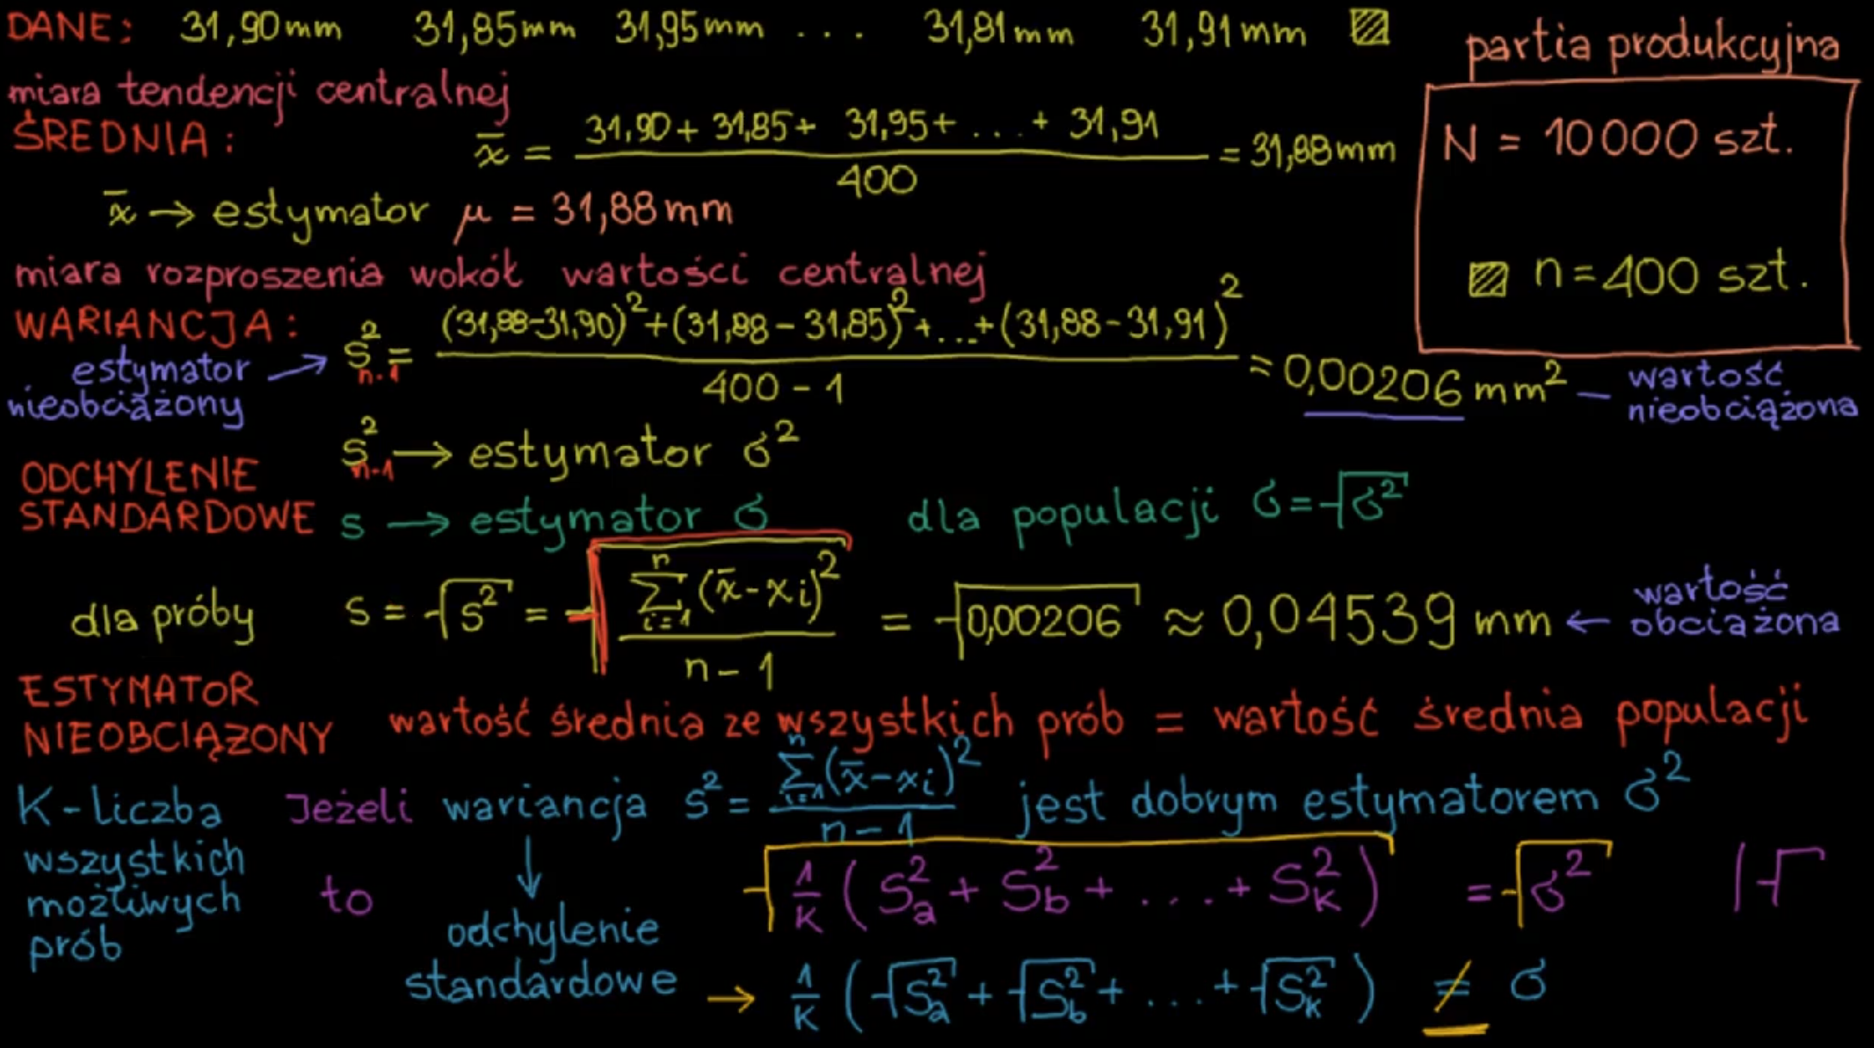

Krótka notka ze statystyki:
Najbardziej popularne estymatory to:
*   średnia (miara tendencji centralnej) - linia centralna, przez punkty
*   wariancja (miara rozproszeniia wokół wartości centrlanej) - pole opisujące średnie rozproszenie punktów wokół centrlanej
*   odchylenie standardowe (miara tendencji centralnej) - miara średniego odchylenia od centralnej

Estymator to coś co przewiduje jaka może być wartrość dla populacji na podstawie próby.

Estymator może być obciążony i nieobciążony.
*    obciążony to taki, który jest niedokładny
*    nieobciążony to taki, który jest dokładny

Np. na podstawie czegoś co da się wyprowadzić, ale bez sensu jest się teraz tego uczyć można stwierdzić, że gdy podzielimy przez n-1 zamiast przez n licząc wariację to otrzymamy estymator nieobciążony.

Ale licząc odchylenie standardowe, które w najprosztej postaci jest pierwiastkiem **nieobciążonego** estymatora wariancji, to otrzymamy **obciążony** estymator odchylenia standardowego. Bierze się to stąd że funkcja pierwiastkowa nie jest funkcją liniową, przez co suma kwadratów pierwiastków nie jest kwadratem ich sumy. Daje to pewne przekłamania, które czynią tak liczone odchylenie standardowe obciążonym.

Aby go policzyć nieobciążone odchylenie standardowe nalezy użyc innych wzorów, których również nie ma po co się teraz uczyć.

Trzeba jednak wiedzieć że różne bilbioteki, mogą liczyć w różny sposób odchylenie standardowe. Warto sprawdzić jak jest ono liczone, przed użyciem.




In [150]:
print(f"{df['price']}\n")
print(f"Średnia: {df['price'].mean()}")
print(f"Odchylenie standardowe: {df['price'].std():.4f}")

0    199.0
1     89.0
2     99.0
3    129.0
4     79.0
Name: price, dtype: float64

Średnia: 119.0
Odchylenie standardowe: 48.4768


In [151]:
def standardize(x):
    return (x - x.mean()) / x.std()

standardize(df['price'])

,price
0,1.650274
1,-0.618853
2,-0.412568
3,0.206284
4,-0.825137


In [152]:
from sklearn.preprocessing import scale

scale(df['price'])

array([ 1.84506242, -0.69189841, -0.4612656 ,  0.2306328 , -0.92253121])

Standard scaler is the best tool for scaliing, because it keeps state of results, so we can back to them.

In [153]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df[['price']])
scaler.transform(df[['price']])

array([[ 1.84506242],
       [-0.69189841],
       [-0.4612656 ],
       [ 0.2306328 ],
       [-0.92253121]])

In [154]:
scaler = StandardScaler()
df[['price', 'weight']] = scaler.fit_transform(df[['price', 'weight']])
df

,size,color,gender,price,weight,bought
0,XL,red,female,1.845062,1.366002,yes
1,L,green,male,-0.691898,0.623610,no
2,M,blue,male,-0.461266,-1.603567,yes
3,L,green,female,0.230633,-0.415740,no
4,M,red,female,-0.922531,0.029696,yes


## Summary

In [155]:
le = LabelEncoder()

df['bought'] = le.fit_transform(df['bought'])

scaler = StandardScaler()
df[['price', 'weight']] = scaler.fit_transform(df[['price', 'weight']])

df = pd.get_dummies(data=df, dtype='int', drop_first=True)
df

,price,weight,bought,size_M,size_XL,color_green,color_red,gender_male
0,1.845062,1.366002,1,0,1,0,1,0
1,-0.691898,0.623610,0,0,0,1,0,1
2,-0.461266,-1.603567,1,1,0,0,0,1
3,0.230633,-0.415740,0,0,0,1,0,0
4,-0.922531,0.029696,1,1,0,0,1,0
